<a href="https://colab.research.google.com/github/Kkuntal990/CTW_2020/blob/master/Copy_of_CTW2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, LeakyReLU, Input
import numpy as np
import os
import h5py
import pandas as pd
import time
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#import zipfile

#zip_ref = zipfile.ZipFile("/content/drive/My Drive/CTW2020/CTW2020.zip", 'r')
#zip_ref.extractall("/content/")
#zip_ref.close()

In [0]:
def find(SNR):
    #H_R.shape = (512,56,924,5)
    
    #print(temp.shape)
    idx  = np.argmax(SNR, axis=1)
    return idx
    
def preprocess(H_Re, idx):
    #temp = np.zeros(H_Re.shape[:-1])
    for i in range(H_Re.shape[0]):
        for j in range(H_Re.shape[1]):
            
            H_Re[i,j,:,0] = H_Re[i,j,:,idx[i,j]]
    return H_Re[:,:,:,0]

def preprocess2(H_Re, idx):
    temp = np.zeros(H_Re.shape[:-1])
    for i in range(H_Re.shape[0]):
        for j in range(H_Re.shape[1]):
            temp[i,j] = H_Re[i,j,idx[i,j]]
    return temp

def get_data(data_file):
    f = h5py.File(data_file, 'r')
    H_Re = f['H_Re'][:] #shape (sample size, 56, 924, 5)
    H_Im = f['H_Im'][:] #shape (sample size, 56, 924, 5)
    SNR = f['SNR'][:] #shape (sample size, 56, 5)
    Pos = f['Pos'][:] #shape(sample size, 3)
    f.close()
    return H_Re, H_Im, SNR, Pos

def get_data2(data_file):
    f = h5py.File(data_file, 'r')
    H_Re = f['H_Re'][:] #shape (sample size, 56, 924, 5)
    H_Im = f['H_Im'][:] #shape (sample size, 56, 924, 5)
    SNR = f['SNR'][:] #shape (sample size, 56, 5)
    #Pos = f['Pos'][:] #shape(sample size, 3)
    f.close()
    return H_Re, H_Im, SNR
'''
def mag(data):x

    dim = H.shape[1]
    H_re = H[:, :dim/2]
    H_Im = H[:, dim/2:]
    return np.sqrt(H_re**2 + H_Im**2)
'''

'\ndef mag(data):x\n\n    dim = H.shape[1]\n    H_re = H[:, :dim/2]\n    H_Im = H[:, dim/2:]\n    return np.sqrt(H_re**2 + H_Im**2)\n'

In [0]:
import h5py

def load_labelled(path):
    f = h5py.File(path, 'r')
    H_Re = f['H_Re'][:] #shape (sample size, 56, 924, 5)
    H_Im = f['H_Im'][:] #shape (sample size, 56, 924, 5)
    SNR = f['SNR'][:] #shape (sample size, 56, 5)
    Pos = f['Pos'][:] #shape(sample size, 3)
    f.close()
    print(1)
    return H_Re, H_Im, SNR, Pos

def load_unlabelled(path):
    f = h5py.File(path, 'r')
    H_Re = f['H_Re'][:] #shape (sample size, 56, 924, 5)
    H_Im = f['H_Im'][:] #shape (sample size, 56, 924, 5)
    SNR  = f['SNR'][:]  #shape (sample size, 56, 5)
    print(SNR.shape)
    f.close()
    return H_Re, H_Im, SNR

In [0]:
H_Re , H_Im , SNR , Pos = load_labelled("/content/drive/My Drive/CTW2020/CTW2020_labelled_data/file_1.hdf5")
#tH_Re , tH_Im , tSNR  = load_unlabelled("/content/drive/My Drive/CTW2020/Processed Data/Unlabelled.hdf5")
#H_Re, H_Im, SNR  = np.concatenate((H_Re, tH_Re)), np.concatenate((H_Im, tH_Im)), np.concatenate((SNR, tSNR))
#del tSNR

1


In [0]:
print(tH_Re.shape)
#del tH_Re, tH_Im, tSNR

(36192, 56, 924)


In [0]:
#CTW_labelled = "/content/drive/My Drive/CTW2020/CTW2020_Unlabelled/"
#import os
#print(os.listdir("/content/drive/My Drive/CTW2020/Processed Data"))
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
#%%
x = np.linspace(1,924,924,dtype=float)

y = []

for i in range(924):
  y.append(data[9,1,i])

#data_file = CTW_labelled+"file_"+str(1)+".hdf5"
#H_Re, H_Im, SNR = get_data2(data_file)

#print(H_Re[1,1,1,:])

#idx = find(tSNR)
#del tSNR
#tH_Re = preprocess(tH_Re, idx)
#tH_Im = preprocess(tH_Im, idx)
#SNR = preprocess2(SNR, idx)
#print(SNR.shape)
#del idx

In [0]:
'''

for i in range(2,15):
    temp = CTW_labelled + "file_"+str(i)+".hdf5"
    tH_Re, tH_Im, tSNR = get_data2(temp)
    idx = find(tSNR)
    tH_Re = preprocess(tH_Re, idx)
    tH_Im = preprocess(tH_Im, idx)
    tSNR = preprocess2(tSNR, idx)
    H_Re, H_Im, SNR  = np.concatenate((H_Re, tH_Re)), np.concatenate((H_Im, tH_Im)), np.concatenate((SNR, tSNR))

del tH_Re,tH_Im,tSNR'''x


In [0]:
from sklearn.preprocessing import MinMaxScaler
#samples = tH_Re.shape[0]
#H_Re = tH_Re.reshape((samples,-1))
#print(tH_Re.shape)
#H_Im = tH_Im.reshape((samples,-1))
#SNR = SNR.reshape((samples,-1))
#Pos = Pos.reshape((samples,-1))

data = np.sqrt(H_Re**2 + H_Im**2)
#data2 = np.sqrt(tH_Re**2 + tH_Im**2)
#del tH_Re , tH_Im , H_Re, H_Im
print(data.shape)

(512, 56, 924, 5)


(512, 56, 924, 5)


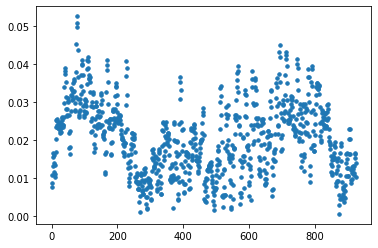

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
#%%
dim1 = data2.shape[0]
dim2 = data2.shape[1]
new_dim = 77
data3 = np.zeros((dim1,dim2, new_dim))

#Polynomial fitting code
for u in range(dim1):
    for v in range(dim2):
        
        degrees = [4,5,6,7,8]
        
        batches = [0,242,220,473,451,704,682,924]  #len = 8
        final_x = np.linspace(1,924,924)
        final_y = np.zeros((924,))
        for i in range(4):
            x = np.linspace(batches[i*2],batches[2*i + 1],-batches[i*2]+batches[2*i + 1])
           # print()
            #print(x.shape)
            y = []
        
            for j in range(batches[i*2],batches[2*i+1]):
                y.append(data[9,1,j])
             
            y = np.array(y)
            x = x[:, np.newaxis]
            y = y[:, np.newaxis]
            r2 = 0
            best_deg = 0
            for deg in degrees:
                polynomial_features= PolynomialFeatures(degree=deg, interaction_only=False)
                x_poly = polynomial_features.fit_transform(x)
                model = LinearRegression()
                model.fit(x_poly, y)
                y_poly_pred = model.predict(x_poly)
                
                rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
                temp = r2_score(y,y_poly_pred)
                if temp > r2:
                    best_deg = deg
                    final_y[batches[i*2]:batches[2*i+1]] = y_poly_pred.reshape((-1))
                    
        data3[u,v,:] = [final_y[i] for i in range(0,len(final_y), 12)]  

#%%

plt.plot(final_x, final_y)

x1 = np.linspace(1,924,924,dtype=float)

y1 = []

for i in range(924):
  y1.append(data[9,1,i])

y1 = np.array(y1)

plt.scatter(x1,y1,s=12)



In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca_50 = PCA(n_components=5000)
y = pca_50.fit_transform(data)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9999203382894867


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adadelta

def create_model(input_dim):
    inp = Input(shape=(input_dim))
    layer2 = Dense(1024, activation='relu')(inp)
    #layer3 = Dense(512, activation='relu')(layer2)
    layer4 = Dense(256, activation='relu')(layer3)
    encoded = Dense(64, activation='relu')(layer4)
    layer5 =  Dense(256, activation='relu')(encoded)
    #layer6 = Dense(512, activation='relu')(layer5)
    layer7 = Dense(1024, activation='relu')(layer6)
    decoded = Dense(input_dim, activation='relu')(layer7)

    return Model(inp, encoded), Model(inp, decoded)

def data_gen(data):
    for i in range(len(data)):
        yield (data[i:i+1],data[i:i+1])
    

In [0]:
from sklearn.model_selection import train_test_split
y,y_v  = train_test_split(y, test_size=0.3, random_state=54) 
print(y.shape)
steps = len(y)
print(steps)
val_Steps = len(y_v)
print(val_Steps)

(5398, 5000)
5398
2314


In [0]:
encoder, autoencoder = create_model(inp_dim)
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystopper = EarlyStopping(patience = 10, verbose=1)
checkpointer = ModelCheckpoint('Best.h5', verbose=1, save_best_only=True)
for i in range(200):
    autoencoder.fit_generator(data_gen(y),validation_data = data_gen(y_v), epochs = 1, steps_per_epoch = steps ,
                        validation_steps = len(y_v), callbacks=[earlystopper, checkpointer])
model.save('mymodel2.h5')

In [0]:
#CLassifier

def cls(inp):
  inp = Input(shape=(inp,))
  x = Dense(512, activation='relu')(inp)
  x = Dropout(0.4)(x)
  x = Dense(512, activation='softmax')(x)
  return Model(inp, x)


